In [36]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

def hyperbolic_geodesic(p, q, ax=None, num=500, extend=1.2, **kwargs):
    """
    Draw a hyperbolic geodesic through points p and q in the Poincare disk.
    The arc is extended beyond p and q to approach the boundary.
    """
    p = np.array(p, float)
    q = np.array(q, float)

    if ax is None:
        fig, ax = plt.subplots(figsize=(5,5))

    # Diameter through origin
    if abs(p[0]*q[1] - p[1]*q[0]) < 1e-12:
        t = np.linspace(-extend, extend, num)
        d = p / np.linalg.norm(p)
        line = np.outer(t, d)
        mask = np.linalg.norm(line, axis=1) < 1
        ax.plot(line[mask,0], line[mask,1], **kwargs)
        ax.set_aspect('equal')
        return ax

    # Circle center
    xp, yp = p
    xq, yq = q
    denom = 2*(xp*yq - xq*yp)
    if abs(denom) < 1e-12:
        # fallback to straight line
        t = np.linspace(0, 1, num)
        line = np.outer(1-t, p) + np.outer(t, q)
        mask = np.linalg.norm(line, axis=1) < 1
        ax.plot(line[mask,0], line[mask,1], **kwargs)
        ax.set_aspect('equal')
        return ax

    cx = ((xp**2 + yp**2 + 1)*yq - (xq**2 + yq**2 + 1)*yp) / denom
    cy = ((xq**2 + yq**2 + 1)*xp - (xp**2 + yp**2 + 1)*xq) / denom
    r = np.sqrt((xp - cx)**2 + (yp - cy)**2)

    # Angles relative to center
    ang_p = np.arctan2(yp - cy, xp - cx)
    ang_q = np.arctan2(yq - cy, xq - cx)

    # Extend arc beyond p and q
    ang_min = min(ang_p, ang_q) - 0.5  # extend a bit
    ang_max = max(ang_p, ang_q) + 0.5
    theta = np.linspace(ang_min, ang_max, num)

    arc_x = cx + r * np.cos(theta)
    arc_y = cy + r * np.sin(theta)

    # Clip inside unit circle
    mask = arc_x**2 + arc_y**2 < 1
    ax.plot(arc_x[mask], arc_y[mask], **kwargs)
    ax.set_aspect('equal')
    return ax



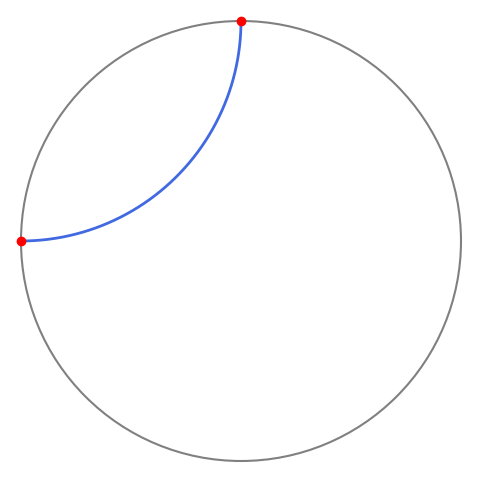

In [41]:
# --- Example usage ---
fig, ax = plt.subplots(figsize=(6,6))

# Unit circle
ax.add_artist(plt.Circle((0,0), 1, fill=False, color='gray', lw=1.5))

# Two interior points
p = (-1, 0)
q = (0, 1)

# Draw the geodesic
hyperbolic_geodesic(p, q, ax=ax, color='royalblue', lw=2)

# Plot points
ax.plot(*p, 'ro')
ax.plot(*q, 'ro')

ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect('equal')
ax.axis('off')
plt.show()


In [1]:
import numpy as np

def hyperbolic_geodesic_circle(p, q, eps=1e-12):
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)
    # Check collinearity with origin: if cross product ~ 0 then diameter
    cross = p[0]*q[1] - p[1]*q[0]
    if abs(cross) < eps:
        # diameter: line through origin and p (or q)
        # return None for center to indicate straight line; give direction vector
        return {"type":"diameter", "direction": p}
    M = np.vstack([p, q])
    b = 0.5 * np.array([p.dot(p) + 1.0, q.dot(q) + 1.0])
    c = np.linalg.solve(M, b)
    r = np.linalg.norm(p - c)
    return {"type":"circle", "center": c, "radius": r}

# Example:
p = (0.2, 0.1)
q = (-0.1, 0.4)
print(hyperbolic_geodesic_circle(p, q))


{'type': 'circle', 'center': array([1.68333333, 1.88333333]), 'radius': np.float64(2.3196024563609074)}
